In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [59]:
autos = pd.read_csv('autos.csv', encoding='ISO-8859-1')
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [60]:
autos.size

7430560

In [61]:
autos.drop_duplicates(keep = 'first', inplace = True )
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [62]:
autos.size

7430480

In [63]:
autos.drop('offerType', axis=1, inplace=True)
autos.drop('seller', axis=1, inplace=True)
autos.drop('nrOfPictures', axis=1, inplace=True)
autos.drop('dateCrawled', axis=1, inplace=True)
autos.drop('dateCreated', axis=1, inplace=True)
autos.drop('lastSeen', axis=1, inplace=True)
autos.drop('postalCode', axis=1, inplace=True)
autos.drop('name', axis=1, inplace=True)
autos.drop('model', axis=1, inplace=True)
autos = autos.dropna(axis=0, how='any')
autos = autos[(autos.price>1000) & (autos.price < 200000)]
autos.size
autos

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,125000,5,diesel,audi,ja
3,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
6,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,150000,12,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


In [64]:
data = autos.copy()

data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])


5.078453895418636


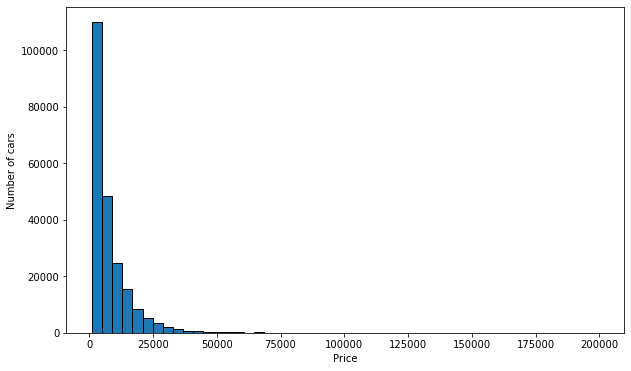

In [65]:
plt.figure(figsize=(10,6))
plt.hist(data['price'], bins=50, ec='black')
plt.xlabel('Price')
plt.ylabel('Number of cars')
plt.show()

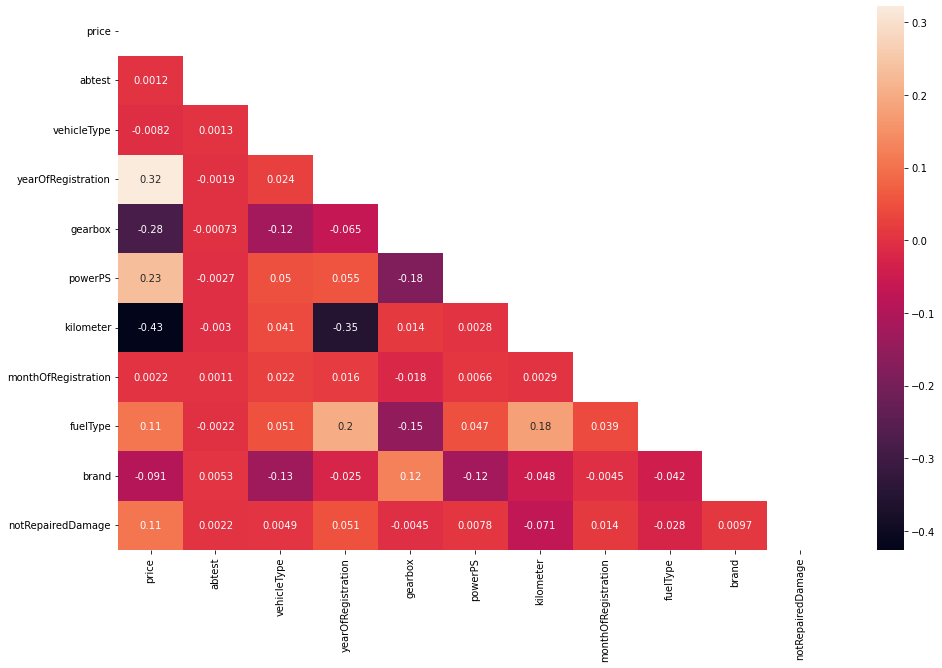

In [66]:
mask = np.zeros_like(data.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True
mask

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [67]:
ss = StandardScaler()

y = data['price']
x = data.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [68]:
alpha_range = [0.0001,0.01, 0.1, 1, 10, 100]

ridge = RidgeCV(alphas=alpha_range, cv=5)
ridge.fit(x_train,y_train)
print("Training set score: {:.10f}".format(ridge.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(ridge.score(x_test, y_test)))

Training set score: 0.3407732475
Test set score: 0.3267112642


In [69]:
ls = Lasso()
ls.fit(x_train, y_train)

print("Training set score: {:.10f}".format(ls.score(x_train, y_train))) 
print("Test set score: {:.10f}".format(ls.score(x_test, y_test))) 

Training set score: 0.3407732326
Test set score: 0.3267130073


In [43]:
model = sm.OLS(y_train, x_train)
res = model.fit()
pd.DataFrame({'coeff' : res.params, 'p-value' : round(res.pvalues, 5)})

,coeff,p-value
x1,4.338358,0.87153
x2,-421.646035,0.00000
x3,1140.429877,0.00000
x4,-1880.858739,0.00000
x5,1958.867853,0.00000
x6,-3692.573389,0.00000
x7,-80.666088,0.00267
x8,1051.319795,0.00000
x9,-511.635158,0.00000
x10,671.724135,0.00000


In [44]:
y_pred_1 = ls.predict(x_test)
df_pred_1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_1})
df_pred_1

,Actual,Predicted
5041,4300,2745.858150
249293,7500,5053.854838
369624,1980,7418.215303
366033,1299,2054.024190
272841,1999,8950.686524
...,...,...
117043,5300,8699.188689
191973,1300,6233.300118
141702,13456,7131.967106
282882,16500,13917.142034


In [45]:
df_pred_1.corr()

,Actual,Predicted
Actual,1.000000,0.573636
Predicted,0.573636,1.000000


In [46]:
df_pred_1.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.692988
Predicted,0.692988,1.000000


In [47]:
y_pred_2 = ridge.predict(x_test)
df_pred_2 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_2})
df_pred_2

,Actual,Predicted
5041,4300,2747.320074
249293,7500,5056.153661
369624,1980,7415.760250
366033,1299,2053.926389
272841,1999,8954.043139
...,...,...
117043,5300,8700.873795
191973,1300,6232.823397
141702,13456,7134.707845
282882,16500,13913.877099


In [48]:
df_pred_2.corr()

,Actual,Predicted
Actual,1.000000,0.573645
Predicted,0.573645,1.000000


In [49]:
df_pred_2.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.693013
Predicted,0.693013,1.000000


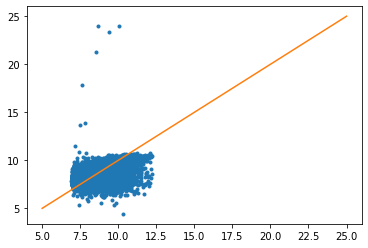

In [25]:
y_pred = ridge.predict(x_test)
plt.plot(y_test, y_pred, '.')
x = np.linspace(25,5,25)
y = x
plt.plot(x,y)
plt.show()